![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [105]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


## Convertimos la columna de sexo a números enteros.

In [106]:
penguins_df['sex'] = penguins_df['sex'].apply(lambda x: 0 if x == 'MALE' else 1)

In [107]:
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
3,36.7,19.3,193.0,3450.0,1
4,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,1
328,46.8,14.3,215.0,4850.0,1
329,50.4,15.7,222.0,5750.0,0
330,45.2,14.8,212.0,5200.0,1


# Escalamos todos los valores menos el del sexo que es categórico.

In [108]:
sc = StandardScaler()
scaled = sc.fit_transform(penguins_df.iloc[:, :4])
scaled_df = pd.DataFrame(data=scaled, columns=penguins_df.columns[:4])
scaled_df['sex'] = penguins_df['sex'].values
penguins_preprocessed = scaled_df
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,0
1,-0.830434,0.126187,-1.068577,-0.504847,1
2,-0.683490,0.432728,-0.426399,-1.187953,1
3,-1.344738,1.096901,-0.569105,-0.939551,1
4,-0.867170,1.761074,-0.783164,-0.691149,0
5,-0.940642,0.330548,-1.425342,-0.722199,1
6,-0.885538,1.250172,-0.426399,0.581912,0
7,-0.536545,0.228367,-1.353989,-1.250054,1
8,-0.995746,2.067616,-0.711811,-0.504847,0
9,-1.363106,0.330548,-1.139930,-0.629049,1


# Hacemos el algoritmo KMEANS hasta 10 clusters y elegimos uno

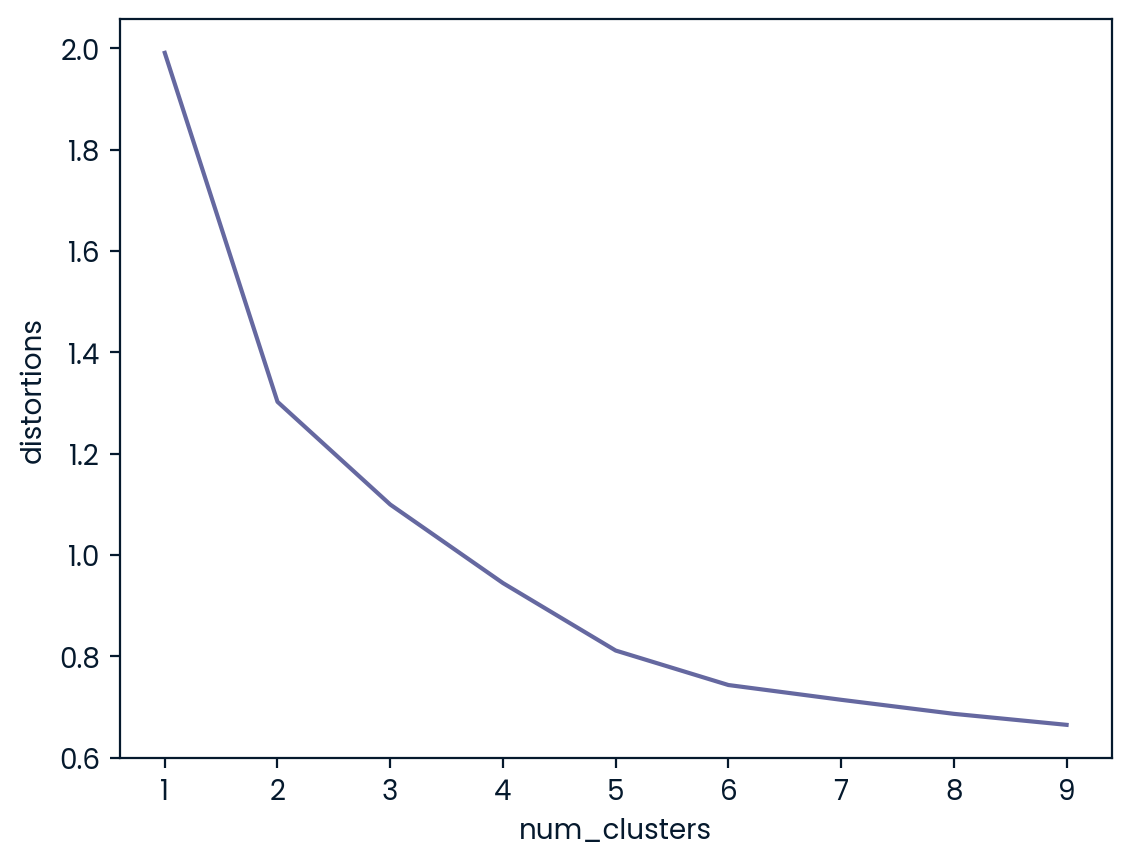

In [109]:
from scipy.cluster.vq import kmeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

distortions = []
num_clusters = range(1, 10)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(penguins_preprocessed, i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

Tomamos tres clusters y estudiamos estos valores.

In [110]:
from numpy import random
from scipy.cluster.vq import kmeans, vq

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(penguins_preprocessed, 3)
penguins_df['cluster_labels'], distortion_list = vq(penguins_preprocessed, cluster_centers)

print(penguins_df.groupby('cluster_labels').mean())

stat_penguins = pd.DataFrame(penguins_df.groupby('cluster_labels').mean())

                culmen_length_mm  culmen_depth_mm  ...  body_mass_g       sex
cluster_labels                                     ...                       
0                      47.568067        14.996639  ...  5092.436975  0.487395
1                      45.738182        18.913636  ...  3970.227273  0.245455
2                      38.089320        17.764078  ...  3435.194175  0.776699

[3 rows x 5 columns]


Se puede observar como hay una clara distinción en los valores de la media de los clusters.

In [111]:
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
cluster_labels,,,,,
0,47.568067,14.996639,217.235294,5092.436975,0.487395
1,45.738182,18.913636,196.090909,3970.227273,0.245455
2,38.089320,17.764078,187.407767,3435.194175,0.776699
